<a href="https://www.kaggle.com/code/adamdandi/cohort-analysis-e-commerce?scriptVersionId=193156681" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importing necessery libraries for future analysis of the dataset
import pandas as pd
import numpy as np

In [2]:
#using pandas library and 'read_csv' function to read data_csv file as file already formated for us from Kaggle
#using encoding to fix UnicodeDecodeError 
data=pd.read_csv("/kaggle/input/ecommerce-data/data.csv", encoding="latin1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#checking data types
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
#checking amount of rows n columns in given dataset to understand the size we are working with

data.shape

(541909, 8)

In [5]:
#checking duplicates
data.duplicated().sum()

5268

In [6]:
#removing duplicates rows
data.drop_duplicates(inplace=True)
data.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

In [7]:
#check null values
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [8]:
#handling missing value
data['Description'].fillna('Unknown', inplace=True)
data.dropna(subset=['CustomerID'], inplace=True)
print(data.isnull().sum())

/tmp/ipykernel_18/1550556403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Description'].fillna('Unknown', inplace=True)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Reformat Timestamp

Timestamp reformatting is necessary in cohort analysis because the data captured is usually available in a more detailed time such as monthly, weekly, or daily.

By reformatting the timestamp, we can easily group customers into specific months or weeks when they join our product.

In [9]:
import dateutil
from datetime import datetime as dt
from pytz import utc

data['datetime'] = data['InvoiceDate'].apply(lambda x: dateutil.parser.parse(x).timestamp())
data['month'] = data['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).month)
data['year'] = data['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).year)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291192e+09,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291192e+09,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010


## Creating Cohorts

Created and added a new column called "cohort" in the data DataFrame, which indicates the month and year of the first time a customer (CustomerID) made a transaction

In [10]:
#AUG 2010 -> 201008
data['cohort'] = data.apply(lambda row: (row['year']*100) + (row['month']), axis =1)
cohorts = data.groupby('CustomerID')['cohort'].min().reset_index()
cohorts.columns = ['CustomerID', 'first_cohort']
data = data.merge(cohorts, on='CustomerID', how='left')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year,cohort,first_cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012


## Creating a Cohort Header

Creating headers for each cohort in Python coding for cohort analysis aims to provide context and clearer information about the cohort being analysed.

The information in the header can make it easier for us to understand the analysis results displayed and make more informed business decisions based on the analysis.

In [11]:
headers = data['cohort'].value_counts().reset_index()
headers.columns = ['Cohorts', 'Count']
headers.head()
headers = headers.sort_values(['Cohorts'])['Cohorts'].to_list()
headers

[201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

## Pivot Data Cohort

In cohort analysis, pivot tables can be used to compare customer behaviour between cohorts. Example:

* Comparing the percentage of customers who make repeat purchases in each cohort.
* Comparing the average number of purchases in each cohort.

By pivoting the data, relevant information can be grouped and compared, providing deeper insights into the business performance of each cohort.

In [12]:
## Delete Rows with NaN Values
data.dropna(inplace=True)
## Calculating cohort_distance
data['cohort_distance'] = data.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort'])) if (row['first_cohort'] != 0 and row['cohort'] != 0) else np.nan, axis=1)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year,cohort,first_cohort,cohort_distance
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291192e+09,12,2010,201012,201012,0


### Creating a Pivot Table
Then, we do a pivot table with index 'first_cohort', column 'cohort_distance', and values 'CustomerID'.

In [13]:
cohort_pivot = pd.pivot_table(data, index='first_cohort', columns='cohort_distance', values='CustomerID', aggfunc=pd.Series.nunique)
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
201012,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
201101,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
201102,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
201103,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
201104,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
201105,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
201106,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
201107,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Pivot Table Normalisation

In the syntax, the pivot cohort is generated from the previously created pivot table. Then normalise the values in each
column by using the value in the first column (column with index 0) as a divisor, namely cohort_pivot.

The goal is to obtain the percentage value of the number of customers who are still active in each period based on the number of customers who joined in the initial period.
who joined in the initial period. In other words, the number of active customers in each period is compared to the number of customers who joined in the initial period.
customers who joined in the initial period.

In [14]:
cohort_pivot = cohort_pivot.div(cohort_pivot[0], axis=0)
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
201012,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
201101,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
201102,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
201103,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
201104,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
201105,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
201106,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
201107,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualisasi Cohort pada Heatmap

This code creates a heatmap to visualise changes in the number of customers over time, by normalising the data to compare each month to their first month. The colours and values in the heatmap help understand how many customers remain active over time.

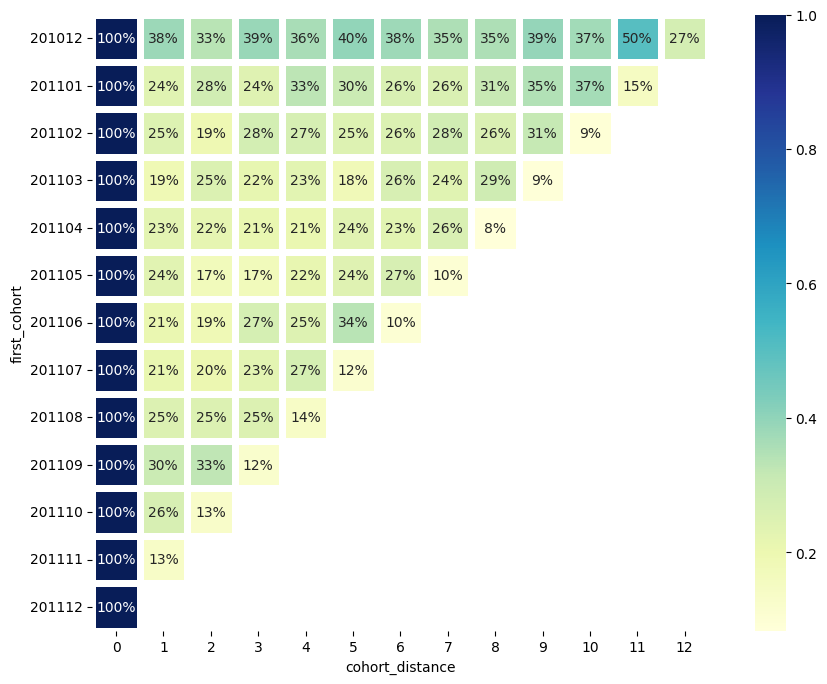

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Determining image size
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
# Creating a heatmap
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', mask=cohort_pivot.isnull(), ax=ax, square=True, linewidth=5, cmap='YlGnBu')
plt.show()